In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [208]:
master_df = []
for i in range(2015, 2020 + 1):
    path = R'C:/Users/voyno/OneDrive/Desktop/Python Projects/Happiness_docs/' + str(i) + '.csv'
    master_df.append(pd.read_csv(path))

In [209]:
for i in range(len(master_df)):
    print("df",i,":\t", len(master_df[i].columns), "features")

df 0 :	 12 features
df 1 :	 13 features
df 2 :	 12 features
df 3 :	 9 features
df 4 :	 9 features
df 5 :	 20 features


In [210]:
def normalize(data):
    
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [211]:
for i in range(len(master_df)):
    for col in master_df[i].columns:
        if master_df[i][col].dtypes != "object":
            master_df[i][col] = normalize(master_df[i][col])

In [212]:
for i in range(len(master_df)):
    print("Year", 2015+i)
    print("." * 135)
    print([master_df[i].columns[j] for j in range(len(master_df[i].columns))], "\n\n")

Year 2015
.......................................................................................................................................
['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'] 


Year 2016
.......................................................................................................................................
['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual'] 


Year 2017
.......................................................................................................................................
['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whiske

In [213]:
for i in range(len(master_df)):
    print(i, master_df[i].columns[0:4].values)

0 ['Country' 'Region' 'Happiness Rank' 'Happiness Score']
1 ['Country' 'Region' 'Happiness Rank' 'Happiness Score']
2 ['Country' 'Happiness.Rank' 'Happiness.Score' 'Whisker.high']
3 ['Overall rank' 'Country or region' 'Score' 'GDP per capita']
4 ['Overall rank' 'Country or region' 'Score' 'GDP per capita']
5 ['Country name' 'Regional indicator' 'Ladder score'
 'Standard error of ladder score']


In [214]:
master_df[3] = master_df[3][['Country or region','Overall rank', 'Score', 'GDP per capita',
                           'Social support', 'Healthy life expectancy',
                           'Freedom to make life choices', 'Generosity',
                           'Perceptions of corruption']]

master_df[4] = master_df[4][['Country or region', 'Overall rank', 'Score', 'GDP per capita',
                           'Social support', 'Healthy life expectancy',
                           'Freedom to make life choices', 'Generosity',
                           'Perceptions of corruption']]

In [215]:
master_df[3].rename(columns={'Country or region': 'Country'}, inplace=True)
master_df[4].rename(columns={'Country or region': 'Country'}, inplace=True)
master_df[5].rename(columns={'Country name': 'Country'}, inplace=True)

In [216]:
for i in range(len(master_df)):
    print(i, master_df[i].columns[0:3].values)

0 ['Country' 'Region' 'Happiness Rank']
1 ['Country' 'Region' 'Happiness Rank']
2 ['Country' 'Happiness.Rank' 'Happiness.Score']
3 ['Country' 'Overall rank' 'Score']
4 ['Country' 'Overall rank' 'Score']
5 ['Country' 'Regional indicator' 'Ladder score']


In [217]:
happiness_feature = "Happiness"

In [218]:
master_df[0].drop(['Region', 'Happiness Rank'], axis=1, inplace=True)
master_df[0].rename(columns={'Happiness Score': happiness_feature}, inplace=True)

In [219]:
master_df[1].drop(['Region', 'Happiness Rank'], axis=1, inplace=True)
master_df[1].rename(columns={'Happiness Score': happiness_feature}, inplace=True)

In [220]:
master_df[2].drop(['Happiness.Rank'], axis=1, inplace=True)
master_df[2].rename(columns={'Happiness.Score': happiness_feature}, inplace=True)

In [221]:
master_df[3].drop(['Overall rank'], axis=1, inplace=True)
master_df[3].rename(columns={'Score': happiness_feature}, inplace=True)

In [222]:
master_df[4].drop(['Overall rank'], axis=1, inplace=True)
master_df[4].rename(columns={'Score': happiness_feature}, inplace=True)

In [223]:
master_df[5].drop(['Regional indicator'], axis=1, inplace=True)
master_df[5].rename(columns={'Ladder score': happiness_feature}, inplace=True)

In [224]:
for i in range(len(master_df)):
    print(i, master_df[i].columns[0:3].values)

0 ['Country' 'Happiness' 'Standard Error']
1 ['Country' 'Happiness' 'Lower Confidence Interval']
2 ['Country' 'Happiness' 'Whisker.high']
3 ['Country' 'Happiness' 'GDP per capita']
4 ['Country' 'Happiness' 'GDP per capita']
5 ['Country' 'Happiness' 'Standard error of ladder score']


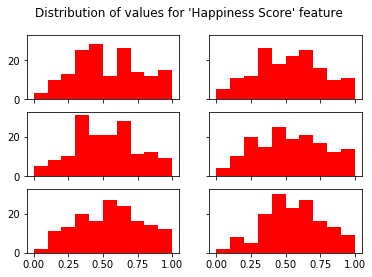

In [225]:
fig, axs = plt.subplots(3,2, sharex=True, sharey=True)
fig.suptitle('Distribution of values for \'Happiness Score\' feature')
for i in range(6):
    axs[i % 3, i % 2].hist(master_df[i]["Happiness"], color='r')

In [226]:
GDP_feature = "GDP"

In [227]:
master_df[0].drop(['Standard Error'], axis=1, inplace=True)
master_df[0].rename(columns={'Economy (GDP per Capita)': GDP_feature}, inplace=True)

In [228]:
master_df[1].drop(['Lower Confidence Interval', 'Upper Confidence Interval'],  axis=1, inplace=True)
master_df[1].rename(columns={'Economy (GDP per Capita)': GDP_feature}, inplace=True)

In [229]:
master_df[2].drop(['Whisker.high', 'Whisker.low'], axis=1, inplace=True)
master_df[2].rename(columns={'Economy..GDP.per.Capita.': GDP_feature}, inplace=True)

In [230]:
master_df[3].rename(columns={'GDP per capita': GDP_feature}, inplace=True)

In [231]:
master_df[4].rename(columns={'GDP per capita': GDP_feature}, inplace=True)

In [232]:
master_df[5].drop(['Standard error of ladder score','upperwhisker', 'lowerwhisker'], axis=1, inplace=True)
master_df[5].rename(columns={'Logged GDP per capita': GDP_feature}, inplace=True)

In [233]:
for i in range(len(master_df)):
    print(i, master_df[i].columns[0:3].values)

0 ['Country' 'Happiness' 'GDP']
1 ['Country' 'Happiness' 'GDP']
2 ['Country' 'Happiness' 'GDP']
3 ['Country' 'Happiness' 'GDP']
4 ['Country' 'Happiness' 'GDP']
5 ['Country' 'Happiness' 'GDP']


In [234]:
for i in range(len(master_df)):
    print(i, master_df[i].columns[3:6].values)

0 ['Family' 'Health (Life Expectancy)' 'Freedom']
1 ['Family' 'Health (Life Expectancy)' 'Freedom']
2 ['Family' 'Health..Life.Expectancy.' 'Freedom']
3 ['Social support' 'Healthy life expectancy' 'Freedom to make life choices']
4 ['Social support' 'Healthy life expectancy' 'Freedom to make life choices']
5 ['Social support' 'Healthy life expectancy' 'Freedom to make life choices']


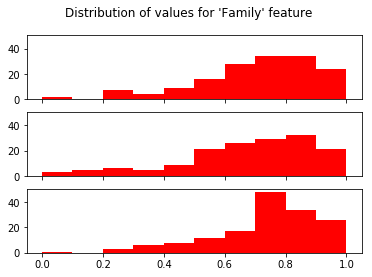

In [235]:
fig, axs = plt.subplots(3, sharex=True, sharey=True)
fig.suptitle('Distribution of values for \'Family\' feature')

for i in range(3):
    axs[i].hist(master_df[i]["Family"], color='r')

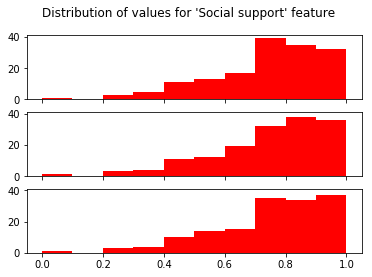

In [236]:
fig, axs = plt.subplots(3, sharex=True, sharey=True)
fig.suptitle('Distribution of values for \'Social support\' feature')

for i in range(3,6):
    axs[i - 3].hist(master_df[i]["Social support"], color='r')

In [237]:
for i in range(3, 6):
    master_df[i].rename(columns={"Social support": "Family"}, inplace=True)

In [238]:
for i in range(len(master_df)):
    print(i, master_df[i].columns[3:6].values)

0 ['Family' 'Health (Life Expectancy)' 'Freedom']
1 ['Family' 'Health (Life Expectancy)' 'Freedom']
2 ['Family' 'Health..Life.Expectancy.' 'Freedom']
3 ['Family' 'Healthy life expectancy' 'Freedom to make life choices']
4 ['Family' 'Healthy life expectancy' 'Freedom to make life choices']
5 ['Family' 'Healthy life expectancy' 'Freedom to make life choices']


In [239]:
health_feature = "Health"
master_df[0].rename(columns={"Health (Life Expectancy)": health_feature}, inplace=True)
master_df[1].rename(columns={"Health (Life Expectancy)": health_feature}, inplace=True)
master_df[2].rename(columns={"Health..Life.Expectancy.": health_feature}, inplace=True)
master_df[3].rename(columns={"Healthy life expectancy": health_feature}, inplace=True)
master_df[4].rename(columns={"Healthy life expectancy": health_feature}, inplace=True)
master_df[5].rename(columns={"Healthy life expectancy": health_feature}, inplace=True)

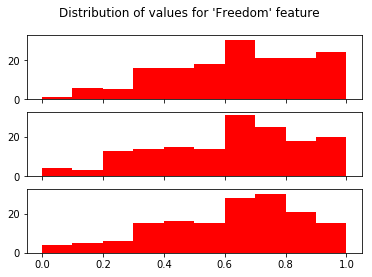

In [240]:
fig, axs = plt.subplots(3, sharex=True, sharey=True)
fig.suptitle('Distribution of values for \'Freedom\' feature')

for i in range(3):
    axs[i].hist(master_df[i]["Freedom"], color='r')

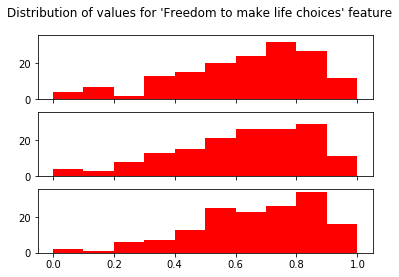

In [241]:
fig, axs = plt.subplots(3, sharex=True, sharey=True)
fig.suptitle('Distribution of values for \'Freedom to make life choices\' feature')

for i in range(3,6):
    axs[i - 3].hist(master_df[i]["Freedom to make life choices"], color='r')

In [242]:
for i in range(3, 6):
    master_df[i].rename(columns={"Freedom to make life choices": "Freedom"}, inplace=True)

In [243]:
for i in range(len(master_df)):
    print(i, master_df[i].columns[3:6].values)

0 ['Family' 'Health' 'Freedom']
1 ['Family' 'Health' 'Freedom']
2 ['Family' 'Health' 'Freedom']
3 ['Family' 'Health' 'Freedom']
4 ['Family' 'Health' 'Freedom']
5 ['Family' 'Health' 'Freedom']


In [244]:
for i in range(len(master_df)):
    print(i, master_df[i].columns[6:8].values)

0 ['Trust (Government Corruption)' 'Generosity']
1 ['Trust (Government Corruption)' 'Generosity']
2 ['Generosity' 'Trust..Government.Corruption.']
3 ['Generosity' 'Perceptions of corruption']
4 ['Generosity' 'Perceptions of corruption']
5 ['Generosity' 'Perceptions of corruption']


In [245]:
master_df[0].columns = ['Country', 'Happiness', 'GDP', 'Family', 'Health', 'Freedom',
       'Generosity', 'Trust (Government Corruption)', 'Dystopia Residual']

master_df[1].columns = ['Country', 'Happiness', 'GDP', 'Family', 'Health', 'Freedom',
       'Generosity', 'Trust (Government Corruption)', 'Dystopia Residual']

In [246]:
for i in range(len(master_df)):
    print(i, master_df[i].columns[6:8].values)

0 ['Generosity' 'Trust (Government Corruption)']
1 ['Generosity' 'Trust (Government Corruption)']
2 ['Generosity' 'Trust..Government.Corruption.']
3 ['Generosity' 'Perceptions of corruption']
4 ['Generosity' 'Perceptions of corruption']
5 ['Generosity' 'Perceptions of corruption']


(array([30., 52., 29., 16.,  3.,  8.,  9.,  1.,  4.,  3.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

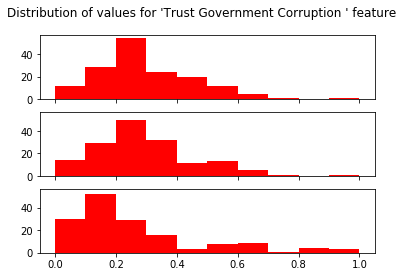

In [248]:
fig, axs = plt.subplots(3, sharex=True, sharey=True)
fig.suptitle('Distribution of values for \'Trust Government Corruption \' feature')

for i in range(2):
    axs[i].hist(master_df[i]["Trust (Government Corruption)"], color='r')
axs[2].hist(master_df[2]["Trust..Government.Corruption."], color='r')

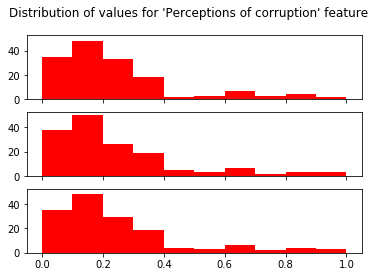

In [250]:
master_df[5]["Perceptions of corruption"] = 1 - master_df[5]["Perceptions of corruption"]

fig, axs = plt.subplots(3, sharex=True, sharey=True)
fig.suptitle('Distribution of values for \'Perceptions of corruption\' feature')

for i in range(3,6):
    axs[i - 3].hist(master_df[i]["Perceptions of corruption"], color='r')

In [251]:
trust_gov_feature = "Trust_gov"
master_df[0].rename(columns={"Trust (Government Corruption)": trust_gov_feature}, inplace=True)
master_df[1].rename(columns={"Trust (Government Corruption)": trust_gov_feature}, inplace=True)
master_df[2].rename(columns={"Trust..Government.Corruption.": trust_gov_feature}, inplace=True)
master_df[3].rename(columns={"Perceptions of corruption": trust_gov_feature}, inplace=True)
master_df[4].rename(columns={"Perceptions of corruption": trust_gov_feature}, inplace=True)
master_df[5].rename(columns={"Perceptions of corruption": trust_gov_feature}, inplace=True)

In [264]:
for i in range(len(master_df)):
    print(i, master_df[i].columns[8:16].values)

0 ['Dystopia Residual']
1 ['Dystopia Residual']
2 ['Dystopia.Residual']
3 []
4 []
5 ['Ladder score in Dystopia' 'Explained by: Log GDP per capita'
 'Explained by: Social support' 'Explained by: Healthy life expectancy'
 'Explained by: Freedom to make life choices' 'Explained by: Generosity'
 'Explained by: Perceptions of corruption' 'Dystopia + residual']


In [268]:
master_features = ['Country', 'Happiness', 'GDP', 'Family', 'Health', 'Freedom', 'Generosity', 'Trust_gov']
for i in range(len(master_df)):
    for col in master_df[i].columns:
        if col not in master_features:
            master_df[i].drop(col, axis=1, inplace=True)

In [269]:
for i in range(len(master_df)):
    print("Year", 2015+i)
    print("." * 135)
    print([master_df[i].columns[j] for j in range(len(master_df[i].columns))], "\n\n")

Year 2015
.......................................................................................................................................
['Country', 'Happiness', 'GDP', 'Family', 'Health', 'Freedom', 'Generosity', 'Trust_gov'] 


Year 2016
.......................................................................................................................................
['Country', 'Happiness', 'GDP', 'Family', 'Health', 'Freedom', 'Generosity', 'Trust_gov'] 


Year 2017
.......................................................................................................................................
['Country', 'Happiness', 'GDP', 'Family', 'Health', 'Freedom', 'Generosity', 'Trust_gov'] 


Year 2018
.......................................................................................................................................
['Country', 'Happiness', 'GDP', 'Family', 'Health', 'Freedom', 'Generosity', 'Trust_gov'] 


Year 2019
..................................